# Fonts clustering

In [2]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import imtools, pca
from scipy.cluster.vq import *

In [3]:
imlist = imtools.get_imlist('a_selected_thumbs') # import dataset

In [4]:
im_n = len(imlist)
print('size of the data set: ',im_n)

size of the data set:  66


let's read images into numpy arrays

In [5]:
imatrix = np.array([np.array(Image.open(img)).flatten() for img in imlist], 'f')

In [13]:
# apply principal component analysis method to project images to feature-space
v,s,imean = pca.pca(imatrix)

[-2.31757188e+00  4.97657844e+05  5.51178000e+05  6.33886688e+05
  6.43909000e+05  7.10696312e+05  7.52695875e+05  7.71076500e+05
  8.52727250e+05  8.77863750e+05  9.00945500e+05  9.80671000e+05
  1.00912256e+06  1.04998150e+06  1.09153000e+06  1.11516712e+06
  1.17385525e+06  1.22009762e+06  1.28209962e+06  1.31070475e+06
  1.36436400e+06  1.37824225e+06  1.45014662e+06  1.51341950e+06
  1.58390688e+06  1.68921925e+06  1.72615888e+06  1.76779075e+06
  1.88579662e+06  1.97543600e+06  1.98841625e+06  2.09129012e+06
  2.17884350e+06  2.29287875e+06  2.43478175e+06  2.53013100e+06
  2.62994950e+06  2.67736975e+06  2.93577300e+06  3.12711050e+06
  3.14831500e+06  3.34534950e+06  3.53368075e+06  3.71008400e+06
  3.96547475e+06  4.24185950e+06  4.69542800e+06  4.87682900e+06
  5.09663650e+06  5.61478400e+06  6.03939950e+06  6.44323200e+06
  6.53691550e+06  7.12559800e+06  7.70177300e+06  8.39240900e+06
  9.26931200e+06  1.03178380e+07  1.21897430e+07  1.23654310e+07
  1.46656860e+07  1.87801

### k-means

Transforming image matrix by extracting mean image values and then multiplying on feature matrix.
Calculating 4 centroids using k-means and then applying vector quantization to cluster the images.

In [25]:
pr = np.array([np.dot(v[:40], imatrix[i]-imean) for i in range(im_n)]) # 
centroids, distortion = kmeans(pr,4) # extracting centroid for 4 classes
code, dist = vq(pr, centroids) # code the images

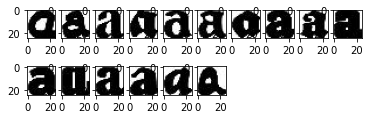

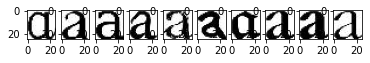

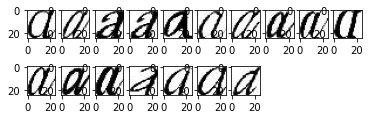

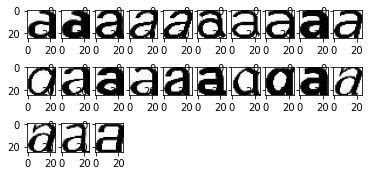

In [29]:
for cl in range(4):
    idx = np.where(code == cl)[0] # images with the given code
    plt.figure()
    plt.gray()
    # result visualization
    for i in range(np.minimum(len(idx), 40)):
        plt.subplot(4, 10, i+1)
        plt.imshow(imatrix[idx[i]].reshape(25,25))
    plt.show()

### Hierarchical Clustering

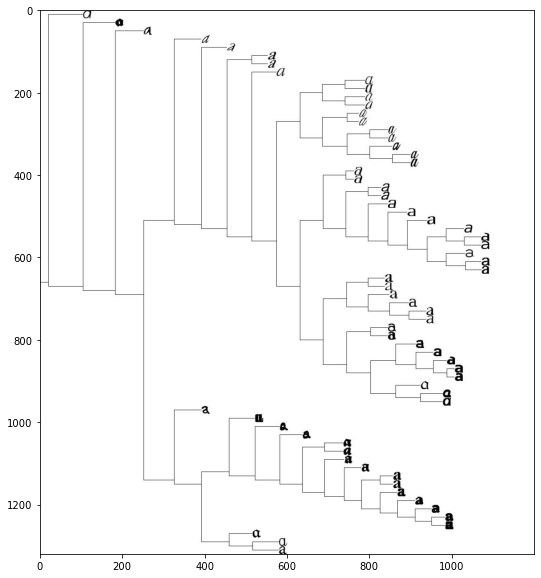

In [111]:
import hcluster
tree = hcluster.hcluster(pr)
im = hcluster.draw_dendrogram(tree, imlist)
im_clust = Image.open('clusters.jpg')
plt.figure(figsize=(14,10))
plt.imshow(im_clust)